In [56]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [46]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\TATAs\Delinquency_prediction_dataset_1.csv")
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [47]:
df.shape

(500, 19)

In [48]:
df.isnull().sum()/df.shape[0]*100


Customer_ID             0.0
Age                     0.0
Income                  7.8
Credit_Score            0.4
Credit_Utilization      0.0
Missed_Payments         0.0
Delinquent_Account      0.0
Loan_Balance            5.8
Debt_to_Income_Ratio    0.0
Employment_Status       0.0
Account_Tenure          0.0
Credit_Card_Type        0.0
Location                0.0
Month_1                 0.0
Month_2                 0.0
Month_3                 0.0
Month_4                 0.0
Month_5                 0.0
Month_6                 0.0
dtype: float64

In [94]:
df.isnull().sum()

Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [51]:
# Summary of key columns and patterns

summary = {}

# Numeric columns
numeric_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments',
                'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']

for col in numeric_cols:
    summary[col] = {
        'missing_%': df[col].isnull().mean() * 100,
        'min': df[col].min(),
        'max': df[col].max(),
        'mean': df[col].mean(),
        'median': df[col].median()
    }

# Categorical columns
categorical_cols = ['Employment_Status', 'Credit_Card_Type', 'Location']

for col in categorical_cols:
    summary[col] = {
        'missing_%': df[col].isnull().mean() * 100,
        'unique_values': df[col].nunique(),
        'most_common': df[col].mode()[0]
    }

# Payment status columns
payment_cols = [f'Month_{i}' for i in range(1, 7)]
for col in payment_cols:
    summary[col] = {
        'missing_%': df[col].isnull().mean() * 100,
        'value_counts': df[col].value_counts().to_dict()
    }

# Delinquent_Account pattern
delinquent_rate = df['Delinquent_Account'].mean() * 100

print("Summary of key columns:")
for k, v in summary.items():
    print(f"\nColumn: {k}")
    for stat, val in v.items():
        print(f"  {stat}: {val}")

print(f"\nOverall Delinquent Account Rate: {delinquent_rate:.2f}%")

Summary of key columns:

Column: Age
  missing_%: 0.0
  min: 18
  max: 74
  mean: 46.266
  median: 46.5

Column: Income
  missing_%: 7.8
  min: 15404.0
  max: 199943.0
  mean: 108379.89370932755
  median: 107658.0

Column: Credit_Score
  missing_%: 0.4
  min: 301.0
  max: 847.0
  mean: 577.7168674698795
  median: 586.0

Column: Credit_Utilization
  missing_%: 0.0
  min: 0.05
  max: 1.025842526
  mean: 0.491445905124
  median: 0.48563557700000004

Column: Missed_Payments
  missing_%: 0.0
  min: 0
  max: 6
  mean: 2.968
  median: 3.0

Column: Delinquent_Account
  missing_%: 0.0
  min: 0
  max: 1
  mean: 0.16
  median: 0.0

Column: Loan_Balance
  missing_%: 5.800000000000001
  min: 612.0
  max: 99620.0
  mean: 48654.42887473461
  median: 45776.0

Column: Debt_to_Income_Ratio
  missing_%: 0.0
  min: 0.1
  max: 0.552956451
  mean: 0.29886164362199996
  median: 0.301633935

Column: Account_Tenure
  missing_%: 0.0
  min: 0
  max: 19
  mean: 9.74
  median: 10.0

Column: Employment_Status
  mis

In [75]:
df['Income'].describe()

count       500.000000
mean     108379.893709
std       51523.025241
min       15404.000000
25%       67610.500000
50%      108379.893709
75%      152572.250000
max      199943.000000
Name: Income, dtype: float64

In [53]:
df['Income'].isnull().sum()

39

<Axes: ylabel='Income'>

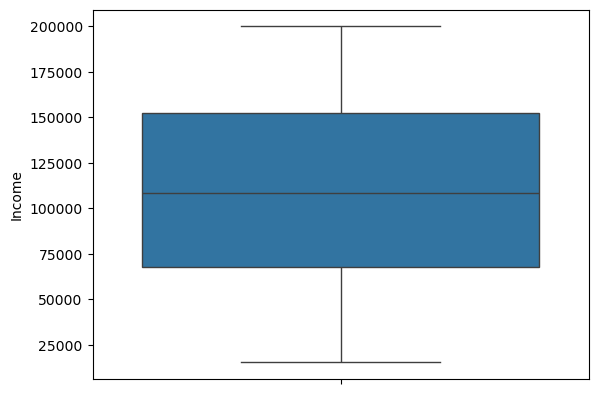

In [76]:
sns.boxplot(df['Income'])

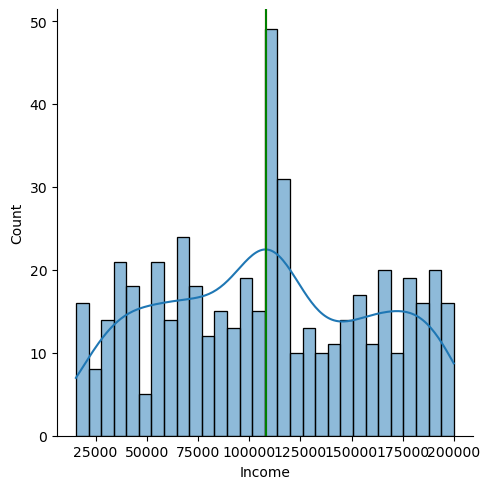

In [74]:
sns.displot(df['Income'], bins=30, kde=True)
plt.axvline(df['Income'].mean(), color= 'r')
plt.axvline(df['Income'].median(), color= 'g')
plt.show()

In [70]:
print(df['Income'].mean())
print(df['Income'].median())
print(df['Income'].skew().round(2))

108379.89370932755
107658.0
0.05


In [73]:

df['Income'].fillna(df['Income'].mean(),inplace= True)

In [85]:
df['Credit_Score'].describe()

count    500.000000
mean     577.716867
std      168.542432
min      301.000000
25%      418.750000
50%      584.000000
75%      725.750000
max      847.000000
Name: Credit_Score, dtype: float64

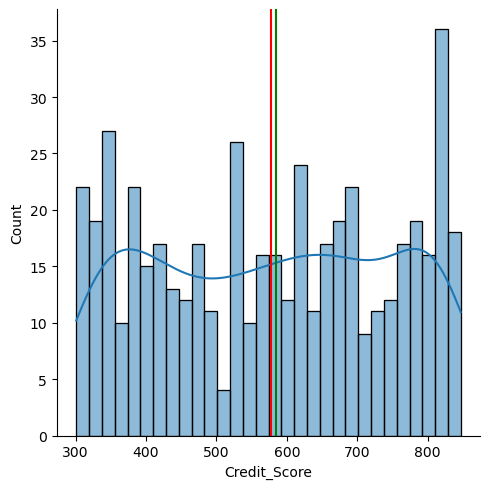

In [92]:
sns.displot(df['Credit_Score'], bins=30, kde=True)
plt.axvline(df['Credit_Score'].mean(), color= 'r')
plt.axvline(df['Credit_Score'].median(), color= 'g')
plt.show()

In [82]:
print("Skewness:", df['Credit_Score'].skew())

Skewness: -0.03405560813525009


In [83]:
df['Credit_Score'].fillna(df['Credit_Score'].mean(), inplace= True)

In [93]:
df['Loan_Balance'].describe()

count      500.000000
mean     48654.428875
std      28528.573640
min        612.000000
25%      24847.000000
50%      48654.428875
75%      73809.500000
max      99620.000000
Name: Loan_Balance, dtype: float64

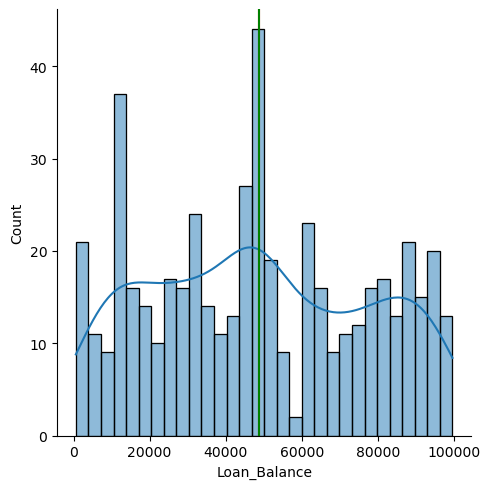

In [91]:
sns.displot(df['Loan_Balance'], bins=30, kde=True)
plt.axvline(df['Loan_Balance'].mean(), color= 'r')
plt.axvline(df['Loan_Balance'].median(), color= 'g')
plt.show()

In [89]:
print("Skewness:", df['Loan_Balance'].skew())

Skewness: 0.1051966422322644


In [90]:
df['Loan_Balance'].fillna(df['Loan_Balance'].mean(), inplace= True)